In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import PIL.Image
import time
import functools

In [0]:
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

In [0]:
content_path = tf.keras.utils.get_file('YellowLabradorLooking_new.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg')

# https://commons.wikimedia.org/wiki/File:Vassily_Kandinsky,_1913_-_Composition_7.jpg
style_path = tf.keras.utils.get_file('kandinsky5.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg')

In [0]:
# content_path = tf.keras.utils.get_file('IMG_20190829_155219.jpg', 'http://webindream.com/wp-content/uploads/2019/11/IMG_20190829_155219.jpg')
# style_path = tf.keras.utils.get_file('1.jpg','http://webindream.com/wp-content/uploads/2020/03/1.jpg')

# content_path = tf.keras.utils.get_file('21st.jpg', 'http://webindream.com/wp-content/uploads/2020/03/21st.jpg')
# style_path = tf.keras.utils.get_file('2.jpg','http://webindream.com/wp-content/uploads/2020/03/2.jpg')

# content_path = tf.keras.utils.get_file('84041323_898972097187612_295487449247776768_n.jpg', 'http://webindream.com/wp-content/uploads/2020/03/84041323_898972097187612_295487449247776768_n.jpg')
# style_path = tf.keras.utils.get_file('3.jpg','http://webindream.com/wp-content/uploads/2020/03/3.jpg')

# content_path = tf.keras.utils.get_file('farhad_portrait.jpg', 'http://webindream.com/wp-content/uploads/2020/03/farhad_portrait.jpeg')
# style_path = tf.keras.utils.get_file('4.jpg','http://webindream.com/wp-content/uploads/2020/03/4.jpg')

# content_path = tf.keras.utils.get_file('IMG_20200220_155828.jpg', 'http://webindream.com/wp-content/uploads/2020/03/IMG_20200220_155828.jpg')
# style_path = tf.keras.utils.get_file('4.jpg','http://webindream.com/wp-content/uploads/2020/03/4.jpg')

# content_path = tf.keras.utils.get_file('44444.jpg', 'http://webindream.com/wp-content/uploads/2020/03/44444.jpg')
# style_path = tf.keras.utils.get_file('5.jpg','http://webindream.com/wp-content/uploads/2020/03/5.jpg')

# content_path = tf.keras.utils.get_file('IMG_20191215_154600.jpg', 'http://webindream.com/wp-content/uploads/2020/03/IMG_20191215_154600.jpg')
# style_path = tf.keras.utils.get_file('3.jpg','http://webindream.com/wp-content/uploads/2020/03/3.jpg')

# content_path = tf.keras.utils.get_file('IMG_20200105_134720.jpg', 'http://webindream.com/wp-content/uploads/2020/03/IMG_20200105_134720.jpg')
# style_path = tf.keras.utils.get_file('2.jpg','http://webindream.com/wp-content/uploads/2020/03/2.jpg')

content_path = tf.keras.utils.get_file('IMG_20191123_195659.jpg', 'http://webindream.com/wp-content/uploads/2020/03/IMG_20191123_195659.jpg')
style_path = tf.keras.utils.get_file('1.jpg','http://webindream.com/wp-content/uploads/2020/03/1.jpg')



1310720/1306057 [==============================] - 1s 1us/step


In [0]:
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

In [0]:
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

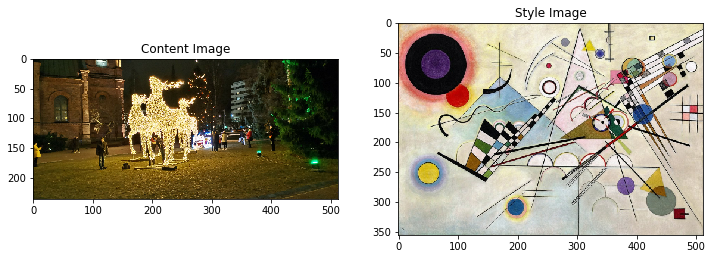

In [0]:
content_image = load_img(content_path)
style_image = load_img(style_path)

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')

In [0]:
import tensorflow_hub as hub
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/1')


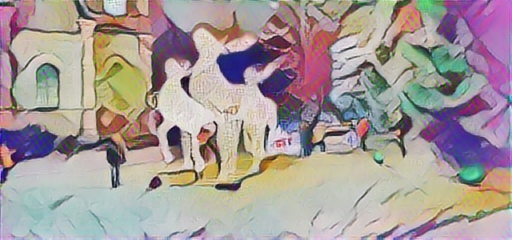

In [0]:
stylized_image = hub_module(tf.constant(content_image), tf.constant(style_image))[0]
tensor_to_image(stylized_image)